In [2]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm
from xhistogram.xarray import histogram
import os
import time
from matplotlib.colors import LogNorm
import dask

In [3]:
# import numpy as np
# import xarray as xr
# import pandas as pd
# import datetime


# from datetime import timedelta, datetime, date
# import calendar

# import numpy as np
# from matplotlib import pyplot as plt
# %matplotlib inline
# import os
# import glob


In [4]:
url1 = 'https://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.'
# varying_url = 'ESRL/.FIMr1p1/'
# url2 = '.hindcast/.pr/Y/(23N)/(60N)/RANGEEDGES/X/(140W)/(50W)/RANGEEDGES/S/(Dec)/(Feb)/RANGEEDGES/%5BX/Y%5Daverage/dods'
url2 = '/.hindcast/.'
var_name = ['pr', 'tas', 'tdps', 'wap', 'cape']
url_L = '/L/(0)/(30)/RANGEEDGES'
# url3 = '/Y/(23N)/(60N)/RANGEEDGES/X/(140W)/(50W)/RANGEEDGES/%5BX/Y%5Daverage/dods'  
url3 = '/Y/(23N)/(50N)/RANGEEDGES/X/(130W)/(60W)/RANGEEDGES/dods'  

varying_url = ['ESRL/.FIMr1p1',
               #'CESM/.30LCESM1', 'CESM/.46LCESM1',
               #'ECCC/.GEM','ECCC/.GEPS5','ECCC/.GEPS6',
               'EMC/.GEFS',
               'GMAO/.GEOS_V2p1',
               'NRL/.NESM',
               'RSMAS/.CCSM4',
#                'NCEP/.CFSv2'
              ]


var_name = ['pr', 'tas', 'tdps', 'wap', 'cape']
var_name_q1 = ['tas', 'tdps', 'lnwap', 'lncape'] # pr vs.
var_name_q2 = ['tdps', 'lnwap', 'lncape'] # t vs.
var_name_q3 = ['lnwap', 'lncape'] # td vs.
var_name_q4 = 'lncape' # wap vs.

q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99]
MASK_url = 'http://iridl.ldeo.columbia.edu/expert/SOURCES/.Models/.SubX/'
MASK_url1 = '/.hindcast/.pr'
MASK_url2 = '/dup/.SOURCES/.Features/.Political/.World/.Countries/.the_geom/objectid/135/VALUE/rasterize/dods'

In [5]:
for i_v_u in varying_url:
    print(i_v_u)
    dsl=[]
    for i_v_n in var_name:
        try:
#             print(url1+i_v_u+url2+i_v_n+url_L+url3)
            dsl.append(xr.open_dataset(url1+i_v_u+url2+i_v_n+url_L+url3))
        except:
            print('missing '+i_v_n)
    ds = xr.merge(dsl)
    ds_mask = xr.open_dataset(MASK_url+i_v_u+MASK_url1+url3[:-5]+MASK_url2)
    ds_mask['the_geom']=xr.where(ds_mask.the_geom!=0, 1, 0)
    print(ds)
    ds =  ds.chunk({'S':100, 'X':45})
    ds = ds.where(ds_mask.the_geom)
    
    start = time.time()
    with dask.config.set(scheduler='single-threaded'):
        dsl = ds.compute()
    end = time.time()
    print(end-start)
    
    try:
        ds_to_use = dsl.isel(P=0, drop=True).chunk({'S': 12})
    except:
        ds_to_use = dsl.chunk({'S': 12})
    try:
        ds_to_use = dsl.isel(P1=0, drop=True).chunk({'S': 12})
    except:
        ds_to_use = dsl.chunk({'S': 12})
        
    ds_to_use['pr'] = ds_to_use.pr*86400/24 #(mm/hr)
    try: 
        ds_to_use['lncape'] = np.log(ds_to_use.cape)
    except:
        print('missing cape')
    try: 
        ds_to_use['lnwap'] = np.log(ds_to_use.wap*-1)
    except:
        print('missing wap')
        

    ds_to_use = ds_to_use.sel(X=slice(-103, -90), Y=slice(32,42) )
    

EMC/.GEFS
<xarray.Dataset>
Dimensions:  (L: 30, M: 11, P: 1, S: 939, X: 71, Y: 28)
Coordinates:
  * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2016-12-21 2016-12-28
  * M        (M) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * L        (L) timedelta64[ns] 0 days 12:00:00 ... 29 days 12:00:00
  * Y        (Y) float32 23.0 24.0 25.0 26.0 27.0 ... 46.0 47.0 48.0 49.0 50.0
  * X        (X) float32 -130.0 -129.0 -128.0 -127.0 ... -63.0 -62.0 -61.0 -60.0
  * P        (P) int32 500
Data variables:
    pr       (S, M, L, Y, X) float32 ...
    tas      (S, M, L, Y, X) float32 ...
    tdps     (S, M, L, Y, X) float32 ...
    wap      (P, S, M, L, Y, X) float32 ...
    cape     (S, M, L, Y, X) float32 ...
222.31287956237793
GMAO/.GEOS_V2p1
<xarray.Dataset>
Dimensions:  (L: 30, M: 4, P1: 1, S: 6571, X: 71, Y: 28)
Coordinates:
  * S        (S) datetime64[ns] 1999-01-01 1999-01-02 ... 2016-12-26 2016-12-27
  * M        (M) float32 1.0 2.0 3.0 4.0
  * L        (L) timedelta64[n

KeyboardInterrupt: 

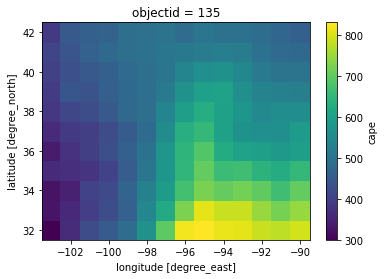

In [6]:
ds_allpr = xr.open_dataset('ds_pr_t_td_cape_EMCB.nc')

ds_to_use.cape.sel(S=ds_allpr.S).mean(dim=['S','L','M']).plot()

In [ ]:
for i_v_u in varying_url:
    print(i_v_u)
    dsl=[]
    for i_v_n in var_name:
        try:
#             print(url1+i_v_u+url2+i_v_n+url_L+url3)
            dsl.append(xr.open_dataset(url1+i_v_u+url2+i_v_n+url_L+url3))
        except:
            print('missing '+i_v_n)
    ds = xr.merge(dsl)
    ds_mask = xr.open_dataset(MASK_url+i_v_u+MASK_url1+url3[:-5]+MASK_url2)
    ds_mask['the_geom']=xr.where(ds_mask.the_geom!=0, 1, 0)
    print(ds)
    ds =  ds.chunk({'S':100, 'X':45})
    ds = ds.where(ds_mask.the_geom)
    
    start = time.time()
    with dask.config.set(scheduler='single-threaded'):
        dsl = ds.compute()
    end = time.time()
    print(end-start)
    try:
        ds_to_use = dsl.isel(P=0, drop=True).chunk({'S': 12})
    except:
        ds_to_use = dsl.chunk({'S': 12})
    try:
        ds_to_use = dsl.isel(P1=0, drop=True).chunk({'S': 12})
    except:
        ds_to_use = dsl.chunk({'S': 12})
        
    ds_to_use['pr'] = ds_to_use.pr*86400/24 #(mm/hr)
    try: 
        ds_to_use['lncape'] = np.log(ds_to_use.cape)
    except:
        print('missing cape')
    try: 
        ds_to_use['lnwap'] = np.log(ds_to_use.wap*-1)
    except:
        print('missing wap')

#     ds_to_use = ds_to_use.isel(S=slice(0,100))

    pr_bins = np.logspace(0, np.log10(ds_to_use.pr.max()*1.1), 200)

    hist_dsl = []
    for i_v_n in var_name_q1:
        try:
            if (i_v_n[0]=='l'):
                step_ar = np.floor((ds_to_use[i_v_n].max()*1.01)/50*100)/100
                b_var_bin = np.arange(0,(ds_to_use[i_v_n].max()*1.01),step_ar)
        #     elif (i_v_n[0]=='w'):
        #         step_ar = np.floor((ds_to_use[i_v_n].max()*1.01-ds_to_use[i_v_n].min()*0.99)/50*10)/10
        #         b_var_bin = np.arange(ds_to_use[i_v_n].min(),ds_to_use[i_v_n].max()*1.01,step_ar)

            else: # for t and td
                step_ar = np.floor((ds_to_use[i_v_n].max()*1.01-270)/50*10)/10
                b_var_bin = np.arange(270,ds_to_use[i_v_n].max()*1.01,step_ar)

            pr_hist_w_dims = histogram(ds_to_use.pr, ds_to_use[i_v_n], bins=[pr_bins, b_var_bin],
                                        dim=['X', 'Y', 'M'])
            pr_hist_w_dims.compute()

            hist_dsl.append(pr_hist_w_dims)
        except:
            print('1missing '+i_v_n)

    step_ar = np.floor((ds_to_use.tas.max()*1.01-270)/50*10)/10
    tas_bin = np.arange(270,ds_to_use.tas.max()*1.01,step_ar)

    for i_v_n in var_name_q2:
        try:
            if (i_v_n[0]=='l'):
                step_ar = np.floor((ds_to_use[i_v_n].max()*1.01)/50*100)/100
                b_var_bin = np.arange(0,(ds_to_use[i_v_n].max()*1.01),step_ar)
        #     elif (i_v_n[0]=='w'):
        #         step_ar = np.floor((ds_to_use[i_v_n].max()*1.01-ds_to_use[i_v_n].min()*0.99)/50*10)/10
        #         b_var_bin = np.arange(ds_to_use[i_v_n].min(),ds_to_use[i_v_n].max()*1.01,step_ar)

            else: # for t and td
                step_ar = np.floor((ds_to_use[i_v_n].max()*1.01-270)/50*10)/10
                b_var_bin = np.arange(270,ds_to_use[i_v_n].max()*1.01,step_ar)

            pr_hist_w_dims = histogram(ds_to_use.tas, ds_to_use[i_v_n], bins=[tas_bin, b_var_bin],
                                        dim=['X', 'Y', 'M'])
            pr_hist_w_dims.compute()

            hist_dsl.append(pr_hist_w_dims)
        except:
            print('2missing '+i_v_n)

    try:
        step_ar = np.floor((ds_to_use.tdps.max()*1.01-270)/50*10)/10
        tdps_bin = np.arange(270,ds_to_use.tdps.max()*1.01,step_ar)
        for i_v_n in var_name_q3:
            try:
                if (i_v_n[0]=='l'):
                    step_ar = np.floor((ds_to_use[i_v_n].max()*1.01)/50*100)/100
                    b_var_bin = np.arange(0,(ds_to_use[i_v_n].max()*1.01),step_ar)
            #     elif (i_v_n[0]=='w'):
            #         step_ar = np.floor((ds_to_use[i_v_n].max()*1.01-ds_to_use[i_v_n].min()*0.99)/50*10)/10
            #         b_var_bin = np.arange(ds_to_use[i_v_n].min(),ds_to_use[i_v_n].max()*1.01,step_ar)

                pr_hist_w_dims = histogram(ds_to_use.tdps, ds_to_use[i_v_n], bins=[tdps_bin, b_var_bin],
                                            dim=['X', 'Y', 'M'])
                pr_hist_w_dims.compute()

                hist_dsl.append(pr_hist_w_dims)
            except:
                print('3missing '+i_v_n)
    except:
        print('4missing '+i_v_n)


    try:
        step_ar = np.floor((ds_to_use[i_v_n].max()*1.01)/50*100)/100
        lnwap_bin = np.arange(0,(ds_to_use.lnwap.max()*1.01),step_ar)
        try:
            step_ar = np.floor((ds_to_use[var_name_q4].max()*1.01)/50*100)/100
            b_var_bin = np.arange(0,(ds_to_use[var_name_q4].max()*1.01),step_ar)

            pr_hist_w_dims = histogram(ds_to_use.lnwap, ds_to_use[var_name_q4], bins=[lnwap_bin, b_var_bin],
                                        dim=['X', 'Y', 'M'])
            pr_hist_w_dims.compute()

            hist_dsl.append(pr_hist_w_dims)
        except:
            print('5missing '+i_v_n)
    except:
        print('6missing '+i_v_n)

#         where_valid = pr_hist_w_dims.where(pr_hist_w_dims>0).count(dim='pr_bin')>25

#         pr_hist_w_dims = pr_hist_w_dims / pr_hist_w_dims.sum(dim='pr_bin')
#         h2d_cum = pr_hist_w_dims.cumsum(dim='pr_bin')

#         where_valid.compute()
#         to_plot = h2d_cum.where(where_valid>0)
#         to_plot.compute()

#         plt.figure()
#         out = to_plot.plot.contour(levels=np.array(q)/100.,col='L', col_wrap=4)
#         coeff_s = 0.068

#         plt.tight_layout()
#         if i_v_n[0]=='l':
#             scale_range = np.arange(-2.5,0, 0.25)
#             coeff_s = 0.5
#             diffvalue = 0
#         elif i_v_n[0]=='w':
#             coeff_s = -1
#             scale_range = np.arange(-0.6, 1, 0.2)
#             diffvalue = 0
#         else:
#             coeff_s = 0.068
#             scale_range = np.arange(-0.6, 2, 0.2)
#             diffvalue = 273.15   

#         for i_axi, axi in enumerate(out.axes.ravel()):
#             axi.set_yscale('log', basey=np.e)
#             reformatta = axi.get_yticks()
#             axi.set_yticks(reformatta)
#             axi.set_yticklabels(np.log(reformatta))
#             for scale in scale_range:
#                 pr_cc = np.exp(scale +coeff_s*(b_var_bin-diffvalue))
#                 axi.plot(b_var_bin, pr_cc, color='k', linestyle='--', linewidth=1, alpha=0.5, zorder=0)
#             blim = b_var_bin[0:-1][where_valid[i_axi]]
#             axi.set_xlim(blim[0]*0.99, blim[-1]*1.01)
#             axi.set_ylim(pr_bins[0], pr_bins[-1]);


    hist_ds = xr.merge(hist_dsl)    
    hist_ds.attrs['model_submodel'] = i_v_u
    hist_ds.to_netcdf('hist_model_submodel_'+i_v_u.replace('/.','_')+'.nc')

GMAO/.GEOS_V2p1
<xarray.Dataset>
Dimensions:  (L: 30, M: 4, P1: 1, S: 6571, X: 71, Y: 28)
Coordinates:
  * S        (S) datetime64[ns] 1999-01-01 1999-01-02 ... 2016-12-26 2016-12-27
  * M        (M) float32 1.0 2.0 3.0 4.0
  * L        (L) timedelta64[ns] 0 days 12:00:00 ... 29 days 12:00:00
  * Y        (Y) float32 23.0 24.0 25.0 26.0 27.0 ... 46.0 47.0 48.0 49.0 50.0
  * X        (X) float32 -130.0 -129.0 -128.0 -127.0 ... -63.0 -62.0 -61.0 -60.0
  * P1       (P1) int32 500
Data variables:
    pr       (S, M, L, Y, X) float32 ...
    tas      (S, M, L, Y, X) float32 ...
    tdps     (S, M, L, Y, X) float32 ...
    wap      (S, M, L, P1, Y, X) float32 ...
    cape     (S, M, L, Y, X) float32 ...


In [7]:
for i_v_u in varying_url:
    print(i_v_u)
    dsl=[]
    for i_v_n in var_name:
        try:
#             print(url1+i_v_u+url2+i_v_n+url_L+url3)
            dsl.append(xr.open_dataset(url1+i_v_u+url2+i_v_n+url_L+url3))
        except:
            print('missing '+i_v_n)
    ds = xr.merge(dsl)
    ds_mask = xr.open_dataset(MASK_url+i_v_u+MASK_url1+url3[:-5]+MASK_url2)
    ds_mask['the_geom']=xr.where(ds_mask.the_geom!=0, 1, 0)
    print(ds)
    ds =  ds.chunk({'S':100, 'X':45})
    ds = ds.where(ds_mask.the_geom)
    
    start = time.time()
    with dask.config.set(scheduler='single-threaded'):
        dsl = ds.compute()
    end = time.time()
    print(end-start)
    try:
        ds_to_use = dsl.isel(P=0, drop=True).chunk({'S': 12})
    except:
        ds_to_use = dsl.chunk({'S': 12})
    try:
        ds_to_use = dsl.isel(P1=0, drop=True).chunk({'S': 12})
    except:
        ds_to_use = dsl.chunk({'S': 12})
        
    ds_to_use['pr'] = ds_to_use.pr*86400/24 #(mm/hr)
    try: 
        ds_to_use['lncape'] = np.log(ds_to_use.cape)
    except:
        print('missing cape')
    try: 
        ds_to_use['lnwap'] = np.log(ds_to_use.wap*-1)
    except:
        print('missing wap')
        

    ds_to_use = ds_to_use.sel(X=slice(-103, -90), Y=slice(32,42) )
    ds_to_use = ds_to_use.sel(S=ds_allpr.S)
    pr_bins = np.logspace(0, np.log10(ds_to_use.pr.max()*1.1), 200)

    hist_dsl = []
    for i_v_n in var_name_q1:
        try:
            if (i_v_n[0]=='l'):
                step_ar = np.floor((ds_to_use[i_v_n].max()*1.01)/50*100)/100
                b_var_bin = np.arange(0,(ds_to_use[i_v_n].max()*1.01),step_ar)
        #     elif (i_v_n[0]=='w'):
        #         step_ar = np.floor((ds_to_use[i_v_n].max()*1.01-ds_to_use[i_v_n].min()*0.99)/50*10)/10
        #         b_var_bin = np.arange(ds_to_use[i_v_n].min(),ds_to_use[i_v_n].max()*1.01,step_ar)

            else: # for t and td
                step_ar = np.floor((ds_to_use[i_v_n].max()*1.01-270)/50*10)/10
                b_var_bin = np.arange(270,ds_to_use[i_v_n].max()*1.01,step_ar)

            pr_hist_w_dims = histogram(ds_to_use.pr, ds_to_use[i_v_n], bins=[pr_bins, b_var_bin],
                                        dim=['X', 'Y', 'M'])
            pr_hist_w_dims.compute()

            hist_dsl.append(pr_hist_w_dims)
        except:
            print('1missing '+i_v_n)

    step_ar = np.floor((ds_to_use.tas.max()*1.01-270)/50*10)/10
    tas_bin = np.arange(270,ds_to_use.tas.max()*1.01,step_ar)

    for i_v_n in var_name_q2:
        try:
            if (i_v_n[0]=='l'):
                step_ar = np.floor((ds_to_use[i_v_n].max()*1.01)/50*100)/100
                b_var_bin = np.arange(0,(ds_to_use[i_v_n].max()*1.01),step_ar)
        #     elif (i_v_n[0]=='w'):
        #         step_ar = np.floor((ds_to_use[i_v_n].max()*1.01-ds_to_use[i_v_n].min()*0.99)/50*10)/10
        #         b_var_bin = np.arange(ds_to_use[i_v_n].min(),ds_to_use[i_v_n].max()*1.01,step_ar)

            else: # for t and td
                step_ar = np.floor((ds_to_use[i_v_n].max()*1.01-270)/50*10)/10
                b_var_bin = np.arange(270,ds_to_use[i_v_n].max()*1.01,step_ar)

            pr_hist_w_dims = histogram(ds_to_use.tas, ds_to_use[i_v_n], bins=[tas_bin, b_var_bin],
                                        dim=['X', 'Y', 'M'])
            pr_hist_w_dims.compute()

            hist_dsl.append(pr_hist_w_dims)
        except:
            print('2missing '+i_v_n)

    try:
        step_ar = np.floor((ds_to_use.tdps.max()*1.01-270)/50*10)/10
        tdps_bin = np.arange(270,ds_to_use.tdps.max()*1.01,step_ar)
        for i_v_n in var_name_q3:
            try:
                if (i_v_n[0]=='l'):
                    step_ar = np.floor((ds_to_use[i_v_n].max()*1.01)/50*100)/100
                    b_var_bin = np.arange(0,(ds_to_use[i_v_n].max()*1.01),step_ar)
            #     elif (i_v_n[0]=='w'):
            #         step_ar = np.floor((ds_to_use[i_v_n].max()*1.01-ds_to_use[i_v_n].min()*0.99)/50*10)/10
            #         b_var_bin = np.arange(ds_to_use[i_v_n].min(),ds_to_use[i_v_n].max()*1.01,step_ar)

                pr_hist_w_dims = histogram(ds_to_use.tdps, ds_to_use[i_v_n], bins=[tdps_bin, b_var_bin],
                                            dim=['X', 'Y', 'M'])
                pr_hist_w_dims.compute()

                hist_dsl.append(pr_hist_w_dims)
            except:
                print('3missing '+i_v_n)
    except:
        print('4missing '+i_v_n)


    try:
        step_ar = np.floor((ds_to_use[i_v_n].max()*1.01)/50*100)/100
        lnwap_bin = np.arange(0,(ds_to_use.lnwap.max()*1.01),step_ar)
        try:
            step_ar = np.floor((ds_to_use[var_name_q4].max()*1.01)/50*100)/100
            b_var_bin = np.arange(0,(ds_to_use[var_name_q4].max()*1.01),step_ar)

            pr_hist_w_dims = histogram(ds_to_use.lnwap, ds_to_use[var_name_q4], bins=[lnwap_bin, b_var_bin],
                                        dim=['X', 'Y', 'M'])
            pr_hist_w_dims.compute()

            hist_dsl.append(pr_hist_w_dims)
        except:
            print('5missing '+i_v_n)
    except:
        print('6missing '+i_v_n)

#         where_valid = pr_hist_w_dims.where(pr_hist_w_dims>0).count(dim='pr_bin')>25

#         pr_hist_w_dims = pr_hist_w_dims / pr_hist_w_dims.sum(dim='pr_bin')
#         h2d_cum = pr_hist_w_dims.cumsum(dim='pr_bin')

#         where_valid.compute()
#         to_plot = h2d_cum.where(where_valid>0)
#         to_plot.compute()

#         plt.figure()
#         out = to_plot.plot.contour(levels=np.array(q)/100.,col='L', col_wrap=4)
#         coeff_s = 0.068

#         plt.tight_layout()
#         if i_v_n[0]=='l':
#             scale_range = np.arange(-2.5,0, 0.25)
#             coeff_s = 0.5
#             diffvalue = 0
#         elif i_v_n[0]=='w':
#             coeff_s = -1
#             scale_range = np.arange(-0.6, 1, 0.2)
#             diffvalue = 0
#         else:
#             coeff_s = 0.068
#             scale_range = np.arange(-0.6, 2, 0.2)
#             diffvalue = 273.15   

#         for i_axi, axi in enumerate(out.axes.ravel()):
#             axi.set_yscale('log', basey=np.e)
#             reformatta = axi.get_yticks()
#             axi.set_yticks(reformatta)
#             axi.set_yticklabels(np.log(reformatta))
#             for scale in scale_range:
#                 pr_cc = np.exp(scale +coeff_s*(b_var_bin-diffvalue))
#                 axi.plot(b_var_bin, pr_cc, color='k', linestyle='--', linewidth=1, alpha=0.5, zorder=0)
#             blim = b_var_bin[0:-1][where_valid[i_axi]]
#             axi.set_xlim(blim[0]*0.99, blim[-1]*1.01)
#             axi.set_ylim(pr_bins[0], pr_bins[-1]);


    hist_ds = xr.merge(hist_dsl)    
    hist_ds.attrs['model_submodel'] = i_v_u
    hist_ds.to_netcdf('hist_TAregion_model_submodel_'+i_v_u.replace('/.','_')+'.nc')

EMC/.GEFS
<xarray.Dataset>
Dimensions:  (L: 30, M: 11, P: 1, S: 939, X: 71, Y: 28)
Coordinates:
  * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2016-12-21 2016-12-28
  * M        (M) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
  * L        (L) timedelta64[ns] 0 days 12:00:00 ... 29 days 12:00:00
  * Y        (Y) float32 23.0 24.0 25.0 26.0 27.0 ... 46.0 47.0 48.0 49.0 50.0
  * X        (X) float32 -130.0 -129.0 -128.0 -127.0 ... -63.0 -62.0 -61.0 -60.0
  * P        (P) int32 500
Data variables:
    pr       (S, M, L, Y, X) float32 ...
    tas      (S, M, L, Y, X) float32 ...
    tdps     (S, M, L, Y, X) float32 ...
    wap      (P, S, M, L, Y, X) float32 ...
    cape     (S, M, L, Y, X) float32 ...


MemoryError: 

In [ ]:
ds

In [9]:
step_ar = np.floor((ds[i_v_n].max()*1.01)/50*100)/100

KeyError: 'lnwap'

In [9]:
ds_to_use

<xarray.Dataset>
Dimensions:   (L: 30, M: 4, S: 965, X: 71, Y: 28, objectid: 1)
Coordinates:
  * S         (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2017-06-21 2017-06-28
  * M         (M) float32 1.0 2.0 3.0 4.0
  * L         (L) timedelta64[ns] 0 days 12:00:00 ... 29 days 12:00:00
  * Y         (Y) float32 23.0 24.0 25.0 26.0 27.0 ... 46.0 47.0 48.0 49.0 50.0
  * X         (X) float32 -130.0 -129.0 -128.0 -127.0 ... -62.0 -61.0 -60.0
  * objectid  (objectid) int32 135
Data variables:
    pr        (S, M, L, Y, X, objectid) float64 dask.array<chunksize=(12, 4, 30, 28, 71, 1), meta=np.ndarray>
    tas       (S, M, L, Y, X, objectid) float32 dask.array<chunksize=(12, 4, 30, 28, 71, 1), meta=np.ndarray>
    tdps      (S, M, L, Y, X, objectid) float32 dask.array<chunksize=(12, 4, 30, 28, 71, 1), meta=np.ndarray>
    wap       (S, M, L, Y, X, objectid) float32 dask.array<chunksize=(12, 4, 30, 28, 71, 1), meta=np.ndarray>
    lnwap     (S, M, L, Y, X, objectid) float32 dask.array<chunksi

In [ ]:
ds

In [7]:
hist_dsl

[<xarray.DataArray 'histogram_pr_tas' (S: 965, L: 30, pr_bin: 199, tas_bin: 54)>
 dask.array<reshape, shape=(965, 30, 199, 54), dtype=int64, chunksize=(100, 30, 199, 54), chunktype=numpy.ndarray>
 Coordinates:
   * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2017-06-21 2017-06-28
   * L        (L) timedelta64[ns] 0 days 12:00:00 ... 29 days 12:00:00
   * pr_bin   (pr_bin) float64 0.9861 0.9587 0.932 ... 0.003927 0.003817 0.003711
   * tas_bin  (tas_bin) float64 270.4 271.3 272.2 273.1 ... 316.3 317.2 318.1,
 <xarray.DataArray 'histogram_pr_tdps' (S: 965, L: 30, pr_bin: 199, tdps_bin: 56)>
 dask.array<reshape, shape=(965, 30, 199, 56), dtype=int64, chunksize=(100, 30, 199, 56), chunktype=numpy.ndarray>
 Coordinates:
   * S         (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2017-06-21 2017-06-28
   * L         (L) timedelta64[ns] 0 days 12:00:00 ... 29 days 12:00:00
   * pr_bin    (pr_bin) float64 0.9861 0.9587 0.932 ... 0.003817 0.003711
   * tdps_bin  (tdps_bin) float64 270

In [192]:
varying_url[0].replace('/.','_')

'ESRL_FIMr1p1'

In [44]:
ds = xr.open_zarr('EMC_GEFS.zarr')
ds['pr'] = ds.pr*86400/24 #(mm/hr)

In [45]:
ds['lncape'] = np.log(ds.cape)
ds['lnwap'] = np.log(ds.wap*-1)


In [23]:
ds.nbytes/1e9

9.143734728

In [52]:
ds = ds.isel(S=slice(0,100)).sel(Y=slice(30, 36), X=slice(-130, -100))

In [69]:

pr_bins = np.logspace(0, np.log10(ds.pr.max()*1.1), 200)
pr_center = 0.5*(pr_bins[:-1] + pr_bins[1:])

hist_dsl = []
for i_v_n in var_name_q1:
    if (i_v_n[0]=='l'):
        step_ar = np.floor((ds[i_v_n].max()*1.01)/50*100)/100
        b_var_bin = np.arange(0,(ds[i_v_n].max()*1.01),step_ar)
#     elif (i_v_n[0]=='w'):
#         step_ar = np.floor((ds[i_v_n].max()*1.01-ds[i_v_n].min()*0.99)/50*10)/10
#         b_var_bin = np.arange(ds[i_v_n].min(),ds[i_v_n].max()*1.01,step_ar)
        
    else: # for t and td
        step_ar = np.floor((ds[i_v_n].max()*1.01-270)/50*10)/10
        b_var_bin = np.arange(270,ds[i_v_n].max()*1.01,step_ar)
    
    pr_hist_w_dims = histogram(ds.pr, ds[i_v_n], bins=[pr_bins, b_var_bin],
                                dim=['X', 'Y', 'M'])
    pr_hist_w_dims.compute()
    
    hist_dsl.append(pr_hist_w_dims)

step_ar = np.floor((ds.tas.max()*1.01-270)/50*10)/10
tas_bin = np.arange(270,ds.tas.max()*1.01,step_ar)
    
for i_v_n in var_name_q2:
    if (i_v_n[0]=='l'):
        step_ar = np.floor((ds[i_v_n].max()*1.01)/50*100)/100
        b_var_bin = np.arange(0,(ds[i_v_n].max()*1.01),step_ar)
#     elif (i_v_n[0]=='w'):
#         step_ar = np.floor((ds[i_v_n].max()*1.01-ds[i_v_n].min()*0.99)/50*10)/10
#         b_var_bin = np.arange(ds[i_v_n].min(),ds[i_v_n].max()*1.01,step_ar)
        
    else: # for t and td
        step_ar = np.floor((ds[i_v_n].max()*1.01-270)/50*10)/10
        b_var_bin = np.arange(270,ds[i_v_n].max()*1.01,step_ar)
    
    pr_hist_w_dims = histogram(ds.tas, ds[i_v_n], bins=[tas_bin, b_var_bin],
                                dim=['X', 'Y', 'M'])
    pr_hist_w_dims.compute()
    
    hist_dsl.append(pr_hist_w_dims)

step_ar = np.floor((ds.tdps.max()*1.01-270)/50*10)/10
tdps_bin = np.arange(270,ds.tdps.max()*1.01,step_ar)
for i_v_n in var_name_q3:
    if (i_v_n[0]=='l'):
        step_ar = np.floor((ds[i_v_n].max()*1.01)/50*100)/100
        b_var_bin = np.arange(0,(ds[i_v_n].max()*1.01),step_ar)
#     elif (i_v_n[0]=='w'):
#         step_ar = np.floor((ds[i_v_n].max()*1.01-ds[i_v_n].min()*0.99)/50*10)/10
#         b_var_bin = np.arange(ds[i_v_n].min(),ds[i_v_n].max()*1.01,step_ar)
    
    pr_hist_w_dims = histogram(ds.tdps, ds[i_v_n], bins=[tdps_bin, b_var_bin],
                                dim=['X', 'Y', 'M'])
    pr_hist_w_dims.compute()
    
    hist_dsl.append(pr_hist_w_dims)

step_ar = np.floor((ds[i_v_n].max()*1.01)/50*100)/100
lnwap_bin = np.arange(0,(ds.lnwap.max()*1.01),step_ar)
if (var_name_q4[0]=='l'):
    step_ar = np.floor((ds[var_name_q4].max()*1.01)/50*100)/100
    b_var_bin = np.arange(0,(ds[var_name_q4].max()*1.01),step_ar)

pr_hist_w_dims = histogram(ds.lnwap, ds[var_name_q4], bins=[lnwap_bin, b_var_bin],
                            dim=['X', 'Y', 'M'])
pr_hist_w_dims.compute()

hist_dsl.append(pr_hist_w_dims)

hist_ds = xr.merge(hist_dsl)    
hist_ds.attrs['model_submodel'] = 'EMC_GEFS'
hist_ds.to_netcdf('hist_model_submodel_EMC_GEFS.nc')

/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in log
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in log
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/local/ERAin/lib/python3.6/site-packages/toolz/functoolz.py:488: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in log
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in log
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/local/ERAin/lib/python3.6/site-packages/toolz/functoolz.py:488: RuntimeWarning: All-NaN sli

/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in log
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in log
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in log
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/local/ERAin/lib/python3.6/site-packages/toolz/functoolz.py:488: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in log
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in log
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice enco

In [70]:
hist_ds

<xarray.Dataset>
Dimensions:                 (L: 8, S: 100, lncape_bin: 52, lnwap_bin: 69, pr_bin: 199, tas_bin: 54, tdps_bin: 55)
Coordinates:
  * S                       (S) datetime64[ns] 1999-01-06 ... 2000-11-29
  * L                       (L) timedelta64[ns] 0 days 12:00:00 ... 7 days 12:00:00
  * pr_bin                  (pr_bin) float64 1.005 1.016 1.026 ... 7.659 7.738
  * tas_bin                 (tas_bin) float64 270.4 271.3 272.2 ... 317.2 318.1
  * tdps_bin                (tdps_bin) float64 270.3 270.9 271.5 ... 302.1 302.7
  * lnwap_bin               (lnwap_bin) float64 0.01 0.03 0.05 ... 1.21 1.23
  * lncape_bin              (lncape_bin) float64 0.08 0.24 0.4 ... 8.08 8.24
Data variables:
    histogram_pr_tas        (S, L, pr_bin, tas_bin) int64 dask.array<chunksize=(12, 8, 199, 54), meta=np.ndarray>
    histogram_pr_tdps       (S, L, pr_bin, tdps_bin) int64 dask.array<chunksize=(12, 8, 199, 55), meta=np.ndarray>
    histogram_pr_lnwap      (S, L, pr_bin, lnwap_bin) float6

In [8]:
var_name_q1

['tas', 'tdps', 'wap', 'lncape']

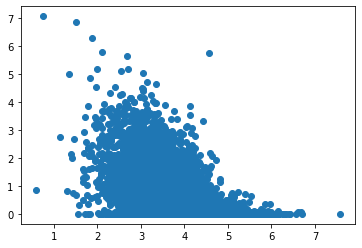

In [8]:
plt.plot( (ds.wap.values.ravel()+4),(ds.pr.values.ravel()), 'o')

/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in log
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in log
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in log
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in log
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in log
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: inva

/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in log
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in log
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in log
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in log
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarnin

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

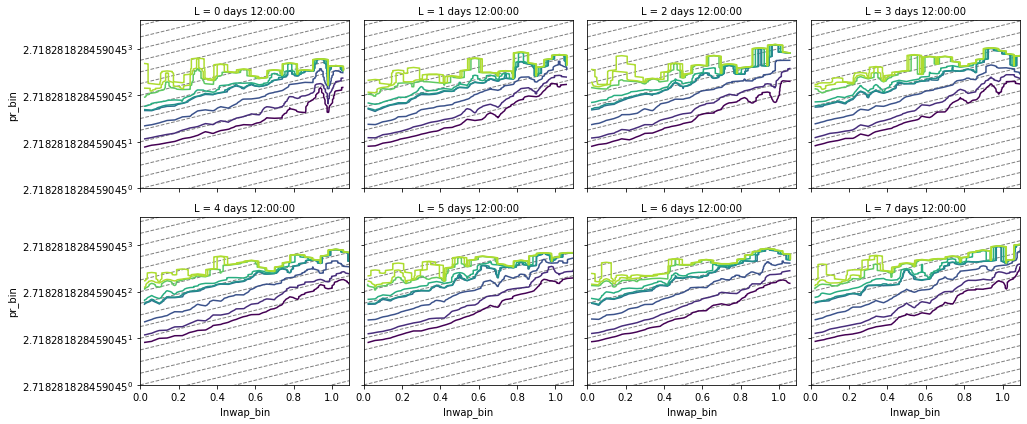

In [51]:

pr_bins = np.logspace(0, np.log10(ds.pr.max()*1.1), 200)

hist_dsl = []
for i_v_n in var_name_q1[2:3]:
    ds_temp = ds[i_v_n]
    ds_temp = ds_temp.where(ds_temp>0)
    step_ar = np.floor((ds_temp.max()*1.01)/50*100)/100
    b_var_bin = np.arange(0,(ds_temp.max()*1.01),step_ar)
        
    pr_hist_w_dims = histogram(ds.pr, ds_temp, bins=[pr_bins, b_var_bin],
                                dim=['X', 'Y', 'M','S'])
    pr_hist_w_dims.compute()
    
    hist_dsl.append(pr_hist_w_dims)
    where_valid = pr_hist_w_dims.where(pr_hist_w_dims>0).count(dim='pr_bin')>25

    pr_hist_w_dims = pr_hist_w_dims / pr_hist_w_dims.sum(dim='pr_bin')
    h2d_cum = pr_hist_w_dims.cumsum(dim='pr_bin')

    where_valid.compute()
    to_plot = h2d_cum.where(where_valid>0)
    to_plot.compute()
    
    plt.figure()
    out = to_plot.plot.contour(levels=np.array(q)/100.,col='L', col_wrap=4)
    coeff_s = 0.068

    plt.tight_layout()
    if i_v_n[2]=='c':
        scale_range = np.arange(-2.5,0, 0.25)
        coeff_s = 0.5
        diffvalue = 0
    elif i_v_n[2]=='w':
        coeff_s = 1
        scale_range = np.arange(-1, 6, 0.25)
        diffvalue = 0
    else:
        coeff_s = 0.068
        scale_range = np.arange(-0.6, 2, 0.2)
        diffvalue = 273.15   

    for i_axi, axi in enumerate(out.axes.ravel()):
        axi.set_yscale('log', basey=np.e)
        reformatta = axi.get_yticks()
        axi.set_yticks(reformatta)
        axi.set_yticklabels(np.log(reformatta))
        for scale in scale_range:
            pr_cc = np.exp(scale +coeff_s*(b_var_bin-diffvalue))
#             pr_cc = (scale +coeff_s*(b_var_bin-diffvalue))
            axi.plot(b_var_bin, pr_cc, color='k', linestyle='--', linewidth=1, alpha=0.5, zorder=0)
        blim = b_var_bin[0:-1][where_valid[i_axi]]
        axi.set_xlim(blim[0]*0.99, blim[-1]*1.01)
        axi.set_ylim(pr_bins[0], pr_bins[-1]);


hist_ds = xr.merge(hist_dsl)    
hist_ds.attrs['model_submodel'] = 'EMC_GEFS'
hist_ds.to_netcdf('hist_model_submodel_EMC_GEFS.nc')

In [50]:
step_ar.values

/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in log
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in log
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)


array(inf, dtype=float32)

In [16]:
pr_bins = np.logspace(0, np.log10(ds.pr.max()*1.1), 200)
pr_bins

array([1.        , 1.01036129, 1.02082994, 1.03140706, 1.04209377,
       1.05289121, 1.06380052, 1.07482287, 1.08595943, 1.09721137,
       1.1085799 , 1.12006622, 1.13167156, 1.14339714, 1.15524421,
       1.16721403, 1.17930788, 1.19152703, 1.20387279, 1.21634647,
       1.22894939, 1.2416829 , 1.25454834, 1.26754708, 1.28068051,
       1.29395001, 1.30735701, 1.32090292, 1.33458918, 1.34841725,
       1.3623886 , 1.3765047 , 1.39076707, 1.40517722, 1.41973667,
       1.43444698, 1.4493097 , 1.46432643, 1.47949874, 1.49482826,
       1.51031661, 1.52596545, 1.54177642, 1.55775122, 1.57389154,
       1.59019909, 1.6066756 , 1.62332284, 1.64014257, 1.65713656,
       1.67430664, 1.69165462, 1.70918235, 1.72689169, 1.74478452,
       1.76286274, 1.78112828, 1.79958307, 1.81822908, 1.83706828,
       1.85610269, 1.87533431, 1.8947652 , 1.91439742, 1.93423305,
       1.9542742 , 1.97452301, 1.99498162, 2.01565221, 2.03653697,
       2.05763813, 2.07895792, 2.10049861, 2.1222625 , 2.14425

In [ ]:

pr_bins = np.logspace(0, np.log10(ds.pr.max()*1.1), 200)

hist_dsl = []
for i_v_n in var_name_q1[2:3]:
    if (i_v_n=='lncape'):
        step_ar = np.floor((ds[i_v_n].max()*1.01)/50*10)/10
        b_var_bin = np.arange(0,(ds[i_v_n].max()*1.01),step_ar)
    elif (i_v_n[0]=='wap'):
        step_ar = np.floor((ds[i_v_n].max()*1.01-ds[i_v_n].min()*0.99)/50*10)/10
        b_var_bin = np.arange(ds[i_v_n].min(),ds[i_v_n].max()*1.01,step_ar)
        
    else: # for t and td
        step_ar = np.floor((ds[i_v_n].max()*1.01-270)/50*10)/10
        b_var_bin = np.arange(270,ds[i_v_n].max()*1.01,step_ar)
    
    pr_hist_w_dims = histogram(ds.pr, ds[i_v_n], bins=[pr_bins, b_var_bin],
                                dim=['X', 'Y', 'M','S'])
    pr_hist_w_dims.compute()
    
    hist_dsl.append(pr_hist_w_dims)
    where_valid = pr_hist_w_dims.where(pr_hist_w_dims>0).count(dim='pr_bin')>25

    pr_hist_w_dims = pr_hist_w_dims / pr_hist_w_dims.sum(dim='pr_bin')
    h2d_cum = pr_hist_w_dims.cumsum(dim='pr_bin')

    where_valid.compute()
    to_plot = h2d_cum.where(where_valid>0)
    to_plot.compute()
    
    plt.figure()
    out = to_plot.plot.contour(levels=np.array(q)/100.,col='L', col_wrap=4)
    coeff_s = 0.068

    plt.tight_layout()
    if i_v_n[0]=='l':
        scale_range = np.arange(-2.5,0, 0.25)
        coeff_s = 0.5
        diffvalue = 0
    elif i_v_n[0]=='w':
        coeff_s = -1
        scale_range = np.arange(-0.6, 1, 0.2)
        diffvalue = 0
    else:
        coeff_s = 0.068
        scale_range = np.arange(-0.6, 2, 0.2)
        diffvalue = 273.15   

    for i_axi, axi in enumerate(out.axes.ravel()):
        axi.set_yscale('log', basey=np.e)
        reformatta = axi.get_yticks()
        axi.set_yticks(reformatta)
        axi.set_yticklabels(np.log(reformatta))
        for scale in scale_range:
            pr_cc = np.exp(scale +coeff_s*(b_var_bin-diffvalue))
            axi.plot(b_var_bin, pr_cc, color='k', linestyle='--', linewidth=1, alpha=0.5, zorder=0)
        blim = b_var_bin[0:-1][where_valid[i_axi]]
        axi.set_xlim(blim[0]*0.99, blim[-1]*1.01)
        axi.set_ylim(pr_bins[0], pr_bins[-1]);


hist_ds = xr.merge(hist_dsl)    
hist_ds.attrs['model_submodel'] = 'EMC_GEFS'
hist_ds.to_netcdf('hist_model_submodel_EMC_GEFS.nc')

In [ ]:
plt.plot(ds.pr.values.ravel(), ds.wap.values.ravel(), 'o')

In [35]:
hist_ds = xr.merge(hist_dsl)
hist_ds.nbytes/1e9*4*1000

13.005504

In [72]:
for scale in np.arange(0.1, 3, 0.1):
    pr_cc = (np.exp(coeff_s*b_var_bin)/1e7)**scale
    print(pr_cc)

[1.25130929 1.25984719 1.26844334 1.27709815 1.28581201 1.29458533
 1.30341851 1.31231196 1.32126609 1.33028131 1.33935805 1.34849672
 1.35769775 1.36696156 1.37628857 1.38567923 1.39513395 1.40465319
 1.41423738 1.42388697 1.4336024  1.44338411 1.45323257 1.46314823
 1.47313154 1.48318297 1.49330298 1.50349205 1.51375063 1.52407922
 1.53447827 1.54494828 1.55548973 1.5661031  1.5767889  1.5875476
 1.59837971 1.60928573 1.62026616 1.63132152 1.64245231 1.65365904
 1.66494224 1.67630243 1.68774013 1.69925588 1.71085019 1.72252362
 1.73427669 1.74610996 1.75802397]
[1.56577494 1.58721494 1.60894852 1.63097969 1.65331253 1.67595118
 1.69889981 1.72216267 1.74574408 1.76964838 1.79388    1.81844342
 1.84334318 1.8685839  1.89417023 1.92010692 1.94639875 1.97305059
 2.00006738 2.0274541  2.05521583 2.0833577  2.11188491 2.14080274
 2.17011654 2.19983173 2.2299538  2.26048834 2.29144098 2.32281746
 2.35462357 2.38686519 2.4195483  2.45267893 2.48626322 2.52030738
 2.5548177  2.58980056 2.625

/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in log
  return func(*args2)
/local/ERAin/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


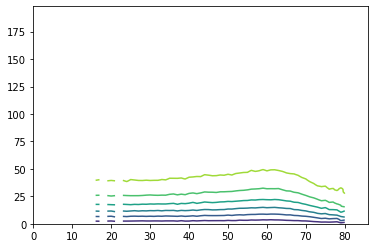

In [179]:
aa = plt.contour(out.data[0])